In [4]:
import pandas as pd

input = pd.read_csv("input.csv")
input.head()

ModuleNotFoundError: No module named 'pandas'

In [2]:
input['id'] = range(1, len(input)+1)
for i in range(len(input)):
    # check if author is a string
    if type(input['author'][i]) != str:
        input['author'][i] = []
    else:
        input['author'][i] = input['author'][i].split(',')
input.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_2200\338955969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['author'][i] = input['author'][i].split(',')
C:\Users\hp\AppData\Local\Temp\ipykernel_2200\338955969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['author'][i] = []


,duration,dtstart,dtend,location,author,type,title,id
0,4.0,2022-05-18T02:00:00Z,2022-05-18T02:04:00Z,"MSR Main room - even hours - , ,","[ Nhan Nguyen, Sarah Nadi]",MSR Technical Papers,An Empirical Evaluation of GitHub Copilot’s C...,1
1,4.0,2022-05-18T02:04:00Z,2022-05-18T02:08:00Z,"MSR Main room - even hours - , ,","[ Nikitha Rao, Jason Tsay, Martin Hirzel, V...",MSR Technical Papers,Comments on Comments: Where Code Review and D...,2
2,7.0,2022-05-18T02:08:00Z,2022-05-18T02:15:00Z,"MSR Main room - even hours - , ,","[ Akalanka Galappaththi, Sarah Nadi, Christo...",MSR Technical Papers,Does This Apply to Me? An Empirical Study of ...,3
3,7.0,2022-05-18T02:15:00Z,2022-05-18T02:22:00Z,"MSR Main room - even hours - , ,","[ Jirat Pasuksmit, Patanamon Thongtanunam, S...",MSR Technical Papers,Towards Reliable Agile Iterative Planning via...,4
4,7.0,2022-05-18T02:22:00Z,2022-05-18T02:29:00Z,"MSR Main room - even hours - , ,","[ Ahmad Abdellatif, Mairieli Wessel, Igor St...",MSR Technical Papers,BotHunter: An Approach to Detect Software Bot...,5


In [3]:
import GA
import random

population_size = 50
max_generations = 100
crossover_probability = 0.8
mutation_probability = 0.2
num_sessions = 28


# create papers
papers = []
for i in range(len(input)):
    paper = GA.Paper(id=input['id'][i], authors=input['author'][i], duration=input['duration'][i])
    papers.append(paper)

session_lengths = [50]*num_sessions
num_tracks_per_session = [random.randint(1, 2) for _ in range(num_sessions)]

session_details = [(
    session_lengths[i],
    num_tracks_per_session[i]
) for i in range(len(session_lengths))]

# Create an instance of the GA class
ga = GA.GeneticAlgorithm(population_size, max_generations, crossover_probability, mutation_probability)

# Create the initial population
initial_population = ga.create_population(papers, session_details, population_size)
pop = GA.Population(initial_population, population_size)

pop.print_population()


Solution 1:
Session 1 (Max length: 50 minutes):
  Track 1 (Total duration: 47.0 minutes):
    Paper ID: 71, Authors:  Gunnar Kudrjavets,  Aditya Kumar,  Nachiappan Nagappan,  Ayushi Rastogi, Topic: 4,  Duration: 7.0 minutes
    Paper ID: 180, Authors: , Topic: 5,  Duration: 21.0 minutes
    Paper ID: 119, Authors:  Justus Bogner,  Manuel Merkel, Topic: 7,  Duration: 7.0 minutes
    Paper ID: 172, Authors:  Anthony Peruma,  Eman Abdullah AlOmar,  Christian D. Newman,  Mohamed Wiem Mkaouer,  Ali Ouni, Topic: 3,  Duration: 8.0 minutes
    Paper ID: 1, Authors:  Nhan Nguyen,  Sarah Nadi, Topic: 5,  Duration: 4.0 minutes
  Track 2 (Total duration: 46.5 minutes):
    Paper ID: 29, Authors:  Ellen Arteca,  Alexi Turcotte, Topic: 1,  Duration: 4.0 minutes
    Paper ID: 182, Authors:  Sangeeth Kochanthara,  Yanja Dajsuren,  Loek Cleophas,  Mark van den Brand, Topic: 9,  Duration: 15.0 minutes
    Paper ID: 147, Authors:  Kalvin Eng,  Hareem Sahar, Topic: 2,  Duration: 5.0 minutes
    Paper ID: 

In [4]:
# calculate fitness of the initial population and print the best solution
best = pop.best_solution(len(papers))
best[0].print_solution()

Session 1 (Max length: 50 minutes):
  Track 1 (Total duration: 47.0 minutes):
    Paper ID: 71, Authors:  Gunnar Kudrjavets,  Aditya Kumar,  Nachiappan Nagappan,  Ayushi Rastogi, Topic: 4,  Duration: 7.0 minutes
    Paper ID: 180, Authors: , Topic: 5,  Duration: 21.0 minutes
    Paper ID: 119, Authors:  Justus Bogner,  Manuel Merkel, Topic: 7,  Duration: 7.0 minutes
    Paper ID: 172, Authors:  Anthony Peruma,  Eman Abdullah AlOmar,  Christian D. Newman,  Mohamed Wiem Mkaouer,  Ali Ouni, Topic: 3,  Duration: 8.0 minutes
    Paper ID: 1, Authors:  Nhan Nguyen,  Sarah Nadi, Topic: 5,  Duration: 4.0 minutes
  Track 2 (Total duration: 46.5 minutes):
    Paper ID: 29, Authors:  Ellen Arteca,  Alexi Turcotte, Topic: 1,  Duration: 4.0 minutes
    Paper ID: 182, Authors:  Sangeeth Kochanthara,  Yanja Dajsuren,  Loek Cleophas,  Mark van den Brand, Topic: 9,  Duration: 15.0 minutes
    Paper ID: 147, Authors:  Kalvin Eng,  Hareem Sahar, Topic: 2,  Duration: 5.0 minutes
    Paper ID: 5, Authors: 

In [5]:
best[1]

{'weighted_time_penalty': 0.0,
 'weighted_author_penalty': 0.0,
 'weighted_distribution_penalty': 0.0,
 'weighted_total_time_unused': 22.25,
 'weighted_coherence_penalty': 2.588902823752538,
 'total_penalty': 24.838902823752537,
 'fitness': 0.038701333675853496}

In [6]:
# print fitness for all solutions
for i in range(population_size):
    print("Solution ", i, " fitness: ", pop.solutions[i].fitness(len(papers)))


Solution  0  fitness:  {'weighted_time_penalty': 0.0, 'weighted_author_penalty': 0.0, 'weighted_distribution_penalty': 0.0, 'weighted_total_time_unused': 22.25, 'weighted_coherence_penalty': 2.588902823752538, 'total_penalty': 24.838902823752537, 'fitness': 0.038701333675853496}
Solution  1  fitness:  {'weighted_time_penalty': 0.0, 'weighted_author_penalty': 2.864583333333333, 'weighted_distribution_penalty': 0.0, 'weighted_total_time_unused': 22.25, 'weighted_coherence_penalty': 2.667708337422657, 'total_penalty': 39.240625004089324, 'fitness': 0.024850508656323756}
Solution  2  fitness:  {'weighted_time_penalty': 0.0, 'weighted_author_penalty': 1.8229166666666667, 'weighted_distribution_penalty': 0.0, 'weighted_total_time_unused': 22.25, 'weighted_coherence_penalty': 2.844747240874797, 'total_penalty': 34.20933057420813, 'fitness': 0.02840156241801795}
Solution  3  fitness:  {'weighted_time_penalty': 0.0, 'weighted_author_penalty': 1.5625, 'weighted_distribution_penalty': 0.0, 'weigh

100%|██████████| 100/100 [00:24<00:00,  4.06it/s]


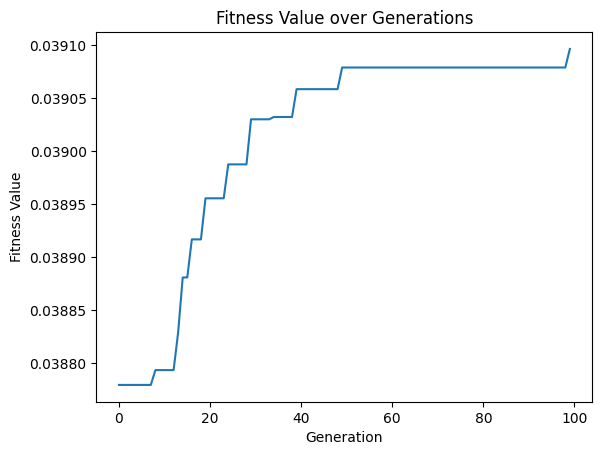

(<GA.Solution at 0x221dc003be0>,
 {'weighted_time_penalty': 0.0,
  'weighted_author_penalty': 0.0,
  'weighted_distribution_penalty': 0.0,
  'weighted_total_time_unused': 22.25,
  'weighted_coherence_penalty': 2.3279451171603798,
  'total_penalty': 24.57794511716038,
  'fitness': 0.03909618209826773})

In [7]:
# run the genetic algorithm

pop = ga.run(papers, num_sessions, session_lengths, num_tracks_per_session, population_size)
# print out results of fittest individual in final population
pop

In [8]:
# print pop 
pop[0].print_solution()


Session 1 (Max length: 50 minutes):
  Track 1 (Total duration: 49.0 minutes):
    Paper ID: 133, Authors:  Viktor Csuvik,  László Vidács, Topic: 9,  Duration: 4.0 minutes
    Paper ID: 50, Authors:  Hossein Keshavarz,  Mei Nagappan, Topic: 10,  Duration: 4.0 minutes
    Paper ID: 9, Authors:  Ambarish Moharil,  Dmitrii Orlov,  Samar Jameel,  Tristan Trouwen,  Nathan Cassee,  Alexander Serebrenik, Topic: 1,  Duration: 4.0 minutes
    Paper ID: 30, Authors:  Kevin Jesse,  Prem Devanbu, Topic: 7,  Duration: 4.0 minutes
    Paper ID: 168, Authors:  Ruben Opdebeeck,  Ahmed Zerouali,  Coen De Roover, Topic: 3,  Duration: 15.0 minutes
    Paper ID: 93, Authors: Apo,  Benjamin Gafford,  Rohan Padhye,  Vincent J. Hellendoorn, Topic: 7,  Duration: 4.0 minutes
    Paper ID: 78, Authors:  Konstantin Grotov,  Sergey Titov,  Vladimir Sotnikov,  Yaroslav Golubev,  Timofey Bryksin, Topic: 10,  Duration: 7.0 minutes
    Paper ID: 74, Authors:  Irving Muller Rodrigues,  Daniel Aloise,  Eraldo Rezende Fe